In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import os

from sklearn.metrics import plot_confusion_matrix

In [7]:
main_dir = r"C:\Users\Aniket Verma\Desktop\Covid Mask Detection\New Masks Dataset"
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')
train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')


In [20]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])                      #check if your directory is linked properly
print(len(train_mask_names))
train_nomask_names = os.listdir(train_nomask_dir) 
print(len(train_nomask_names))
print(train_nomask_names[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']
300
300
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


['C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0003.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0006.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0018.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0019.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0022.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0027.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0029.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Mask\\0037.jpg']
['C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Non Mask\\0.jpg', 'C:\\Users\\Aniket Verma\\Desktop\\Covid Mask Detection\\New Masks Dataset\\Train\\Non Mask\\1.jp

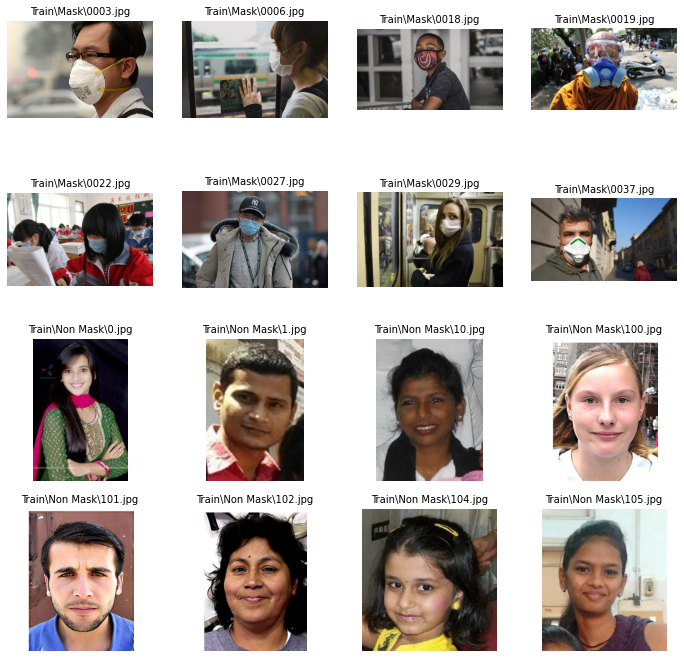

In [21]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('\\',6)[6] # to get training image name only below the image
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()
  


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )


Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [10]:
model = Sequential()
model.add(Conv2D(112,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.7))

model.add(Flatten())

model.add(Dense(96,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 112)     3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 112)       0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 112)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        179264    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [13]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 67s 3s/step - loss: 0.6933 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 56s 3s/step - loss: 0.6929 - accuracy: 0.5367 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 55s 3s/step - loss: 0.6484 - accuracy: 0.5983 - val_loss: 0.4540 - val_accuracy: 0.8366
Epoch 4/30
19/19 [==============================] - 55s 3s/step - loss: 0.4883 - accuracy: 0.8100 - val_loss: 0.4522 - val_accuracy: 0.7941
Epoch 5/30
19/19 [==============================] - 56s 3s/step - loss: 0.4196 - accuracy: 0.8350 - val_loss: 0.3660 - val_accuracy: 0.8660
Epoch 6/30
19/19 [==============================] - 55s 3s/step - loss: 0.3793 - accuracy: 0.8417 - val_loss: 0.2770 - val_accuracy: 0.8954
Epoch 7/30
19/19 [==============================] - 55s 3s/step - loss: 0.2859 - accuracy: 0.8850 - val_loss: 0.2798 - val_accuracy: 0.8824
Epoch 8/30
19/19 [==

Text(0.5, 0, 'epoch')

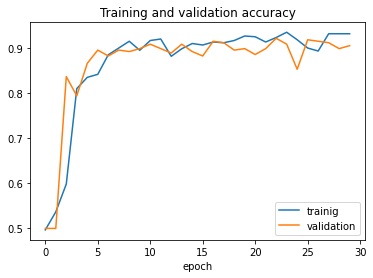

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

In [18]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 4s 442ms/step - loss: 0.1458 - accuracy: 0.9200
test acc :0.9200000166893005 test loss:0.14576587080955505


In [ ]:
import numpy as np
from keras.preprocessing import image

uploaded = "file to be uploaded"
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

In [ ]:
#use model.save() command to obatin the h5 file to be used for video 